In [6]:
import pandas as pd
import numpy as np
import joblib 

from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score, make_scorer, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shared drives/Project 4 (MATH 3439)/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Train and Test Data

In [36]:
train_X = pd.read_csv(drive_dir + 'data/train_X.csv')
test_X = pd.read_csv(drive_dir + 'data/test_X.csv')
train_y = pd.read_csv(drive_dir + 'data/train_y.csv')
test_y = pd.read_csv(drive_dir + 'data/test_y.csv')

#Model Building Preparation

In [37]:
feat_cols = ['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']
# ['horsepower', 'mileage', 'wheel_system', 'year', 
#              'owner_count', 'height', 'engine_type', 'city_fuel_economy', 
#              'options_count', 'width', 'engine_displacement', 'trim_name']
target_col = 'price'


train_X_knn = train_X[feat_cols]
train_y_knn = train_y[target_col]

test_X_knn = test_X[feat_cols]
test_y_knn = test_y[target_col]

#KNN Model

In [ ]:
train_X.head()

,horsepower,wheel_system,year,owner_count,height,engine_type,city_fuel_economy,width,make_name
0,248,2,2018,1,56.5,5,23.0,80.0,4
1,170,0,2020,1,65.4,5,25.0,72.6,8
2,310,3,2019,1,66.0,20,18.0,75.4,15
3,345,0,2006,1,73.9,25,13.0,78.5,8
4,295,0,2019,1,69.3,20,18.0,84.8,24


In [9]:
def mean_abs_pct_error(y_pred, test_y):

  return np.mean(np.abs((test_y - y_pred) / test_y)) * 100

In [ ]:
# knn_reg = KNeighborsRegressor()
# param_grid = {'n_neighbors': np.arange(5,6)}
# my_scorer = {'main': 'accuracy',
#           'custom': make_scorer(mean_abs_pct_error, greater_is_better = False)}
# knn_gscv = GridSearchCV(knn_reg, param_grid, cv=5, scoring=my_scorer, refit='custom')

# sample_X = pd.read_csv(drive_dir + 'data/train_X.csv', nrows=31301, skiprows= range(1, (3)*31301+1))
# sample_y = pd.read_csv(drive_dir + 'data/train_y.csv', nrows=31301, skiprows= range(1, (3)*31301+1))

# X = sample_X[['horsepower', 'mileage', 'wheel_system', 'year', 
#           'owner_count', 'height', 'engine_type', 'city_fuel_economy', 
#           'options_count', 'width', 'engine_displacement', 'trim_name']]
# y = sample_y['price']

# knn_gscv.fit(X, y)
# knn_gscv.best_params_

ValueError: ignored

In [ ]:
def knn_max_acc(start,n,train_X,train_y):

  #create new a knn model
  knn_regg = KNeighborsRegressor()
  #create a dictionary of all values we want to test for n_neighbors
  param_grid = {'n_neighbors': np.arange(start, n)}
  #use gridsearch to test all values for n_neighbors
  knn_gscv = GridSearchCV(knn_regg, param_grid, cv=5)
  #fit model to data
  knn_gscv.fit(train_X, train_y)
  knn_gscv.best_params_

In [ ]:
def powerset(s):
  x = len(s)
  ps = []
  for i in range(1 << x):
       ps.append([s[j] for j in range(x) if (i & (1 << j))])
  
  return ps[1:]

In [ ]:
all_cols = ['horsepower', 'mileage', 'wheel_system', 'year', 
            'owner_count', 'height', 'engine_type', 'city_fuel_economy', 
            'options_count', 'width', 'engine_displacement', 'make_name']

def best_features(train_X, train_y, test_X, test_y, n=5):
  best_cols = None
  best_error = np.infty
  knn_reg = KNeighborsRegressor(n_neighbors = n)
  for cols in powerset(all_cols):
      knn_reg.fit(train_X[cols], train_y['price'])
      test_X_col = test_X[cols]
      test_y_col = test_y['price']
      test_pred = knn_reg.predict(test_X_col)
      error = mean_absolute_error(test_y_col, test_pred)
      if error < best_error:
          best_error = error
          best_cols = cols
#  return best_cols, best_error
  return best_cols

In [38]:
train_X.shape

(336036, 10)

In [39]:
n_rows = 28003
n_chunks_to_load = 12

In [ ]:
best_params_list = []
for i in range(n_chunks_to_load):
  sample_X = pd.read_csv(drive_dir + 'data/train_X.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  sample_y = pd.read_csv(drive_dir + 'data/train_y.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  best_params_list.append(best_features(sample_X, sample_y, test_X, test_y))

KeyError: ignored

In [22]:
n_neighbors_list = []

# Instantiate the model
knn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(5, 15)}
knn_gscv = GridSearchCV(knn_reg, param_grid, cv=5, scoring = 'neg_mean_absolute_error')

# Load data, train the model, repeat
for i in range(n_chunks_to_load):
  sample_X = pd.read_csv(drive_dir + 'data/train_X.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  sample_y = pd.read_csv(drive_dir + 'data/train_y.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  X = sample_X[['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']]
  y = sample_y['price']
  knn_gscv.fit(X, y)
  neighbors = knn_gscv.best_params_
  n_neighbors_list.append(neighbors['n_neighbors'])

KeyboardInterrupt: ignored

In [40]:
prediction_df = pd.DataFrame() 


# Load data, train the model, repeat
# for i, neighbor in enumerate(n_neighbors_list):
knn_reg = KNeighborsRegressor(n_neighbors=5)
for i in range(n_chunks_to_load):
  sample_X = pd.read_csv(drive_dir + 'data/train_X.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  sample_y = pd.read_csv(drive_dir + 'data/train_y.csv', nrows=n_rows, skiprows= range(1, (i)*n_rows+1))
  X = sample_X[['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']]
  y = sample_y['price']
  knn_reg.fit(X, y)
  prediction_df[f'prediction {i}'] = knn_reg.predict(test_X_knn)

  #joblib.dump(knn_reg, drive_dir + 'models/' + f'knn_model{i}.joblib')

In [41]:
prediction_df['mean_pred'] = prediction_df.iloc[:, 0:12].mean(axis=1)

In [42]:
prediction_df['actual'] = test_y

In [43]:
prediction_df.head()

,prediction 0,prediction 1,prediction 2,prediction 3,prediction 4,prediction 5,prediction 6,prediction 7,prediction 8,prediction 9,prediction 10,prediction 11,mean_pred,actual
0,27703.6,26316.8,26385.6,28060.0,26091.2,27763.6,29087.6,26890.2,28917.6,29072.6,25624.4,26795.8,27392.416667,29500.0
1,20130.2,18492.6,21245.2,19687.8,20918.6,20243.8,20262.6,19183.4,20157.4,20218.2,19402.2,21166.0,20092.333333,19254.0
2,16472.2,17439.4,16213.4,17670.0,17049.2,15970.0,16201.4,16489.8,17433.4,16844.2,16143.0,16653.6,16714.966667,15922.0
3,23754.6,23786.6,24194.4,22906.6,24564.8,23777.8,25294.8,22150.0,23874.4,23153.4,24235.4,23527.8,23768.383333,22988.0
4,13575.8,14138.2,13170.8,12403.6,13852.8,13563.8,12227.2,13291.6,13678.2,12396.2,14113.4,12393.8,13233.783333,15400.0


In [44]:
mean_absolute_error(prediction_df['actual'], prediction_df['mean_pred'])

2169.0483264159193

In [45]:
mean_abs_pct_error(prediction_df['mean_pred'], prediction_df['actual'])

13.092030151544677

In [46]:
#prediction_df.to_csv(drive_dir + 'data/knn_pred_df.csv', index = False)

In [32]:
prediction_df = pd.read_csv(drive_dir + 'data/knn_pred_df.csv')

#Graphs (Checking where predictions miss)

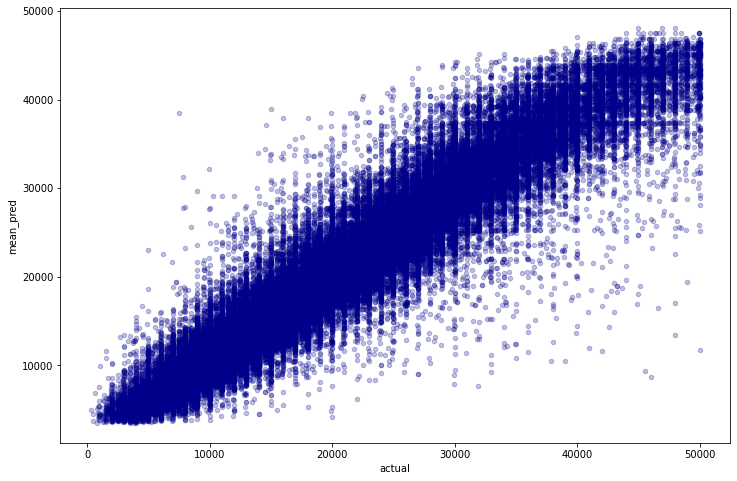

In [47]:
prediction_df.plot.scatter(x='actual',y='mean_pred', c='DarkBlue', alpha = .25, figsize = (12,8))

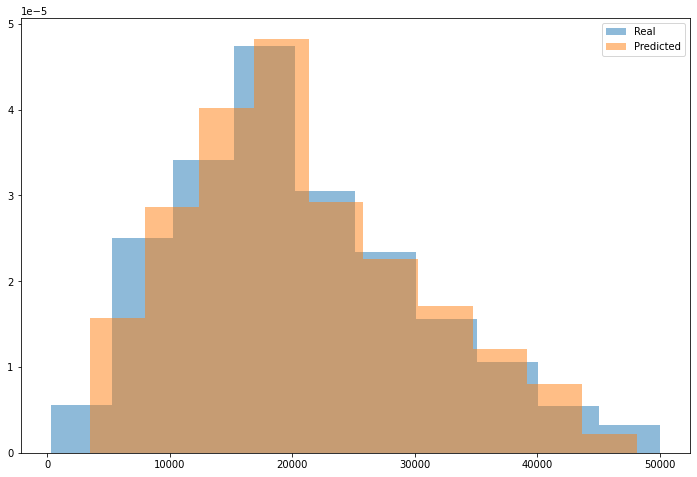

In [48]:
plt.figure(figsize = (12,8))
plt.hist(prediction_df['actual'], alpha = 0.5, density = True, label = 'Real')
plt.hist(prediction_df['mean_pred'], alpha = .5, density = True, label = 'Predicted')
plt.legend()
plt.show();